## LIBRARY IMPORTATION

In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *

%matplotlib inline

In [239]:
import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing

### Import Data

In [316]:
x_cli_train = pd.read_csv('data_x_train/features/clinical_data_train.csv', index_col=0, dtype = {'PatientID': object})

In [317]:
x_cli_train.head()

,Histology,Mstage,Nstage,SourceDataset,Tstage,age
PatientID,,,,,,
202,Adenocarcinoma,0,0,l2,2,66.0000
371,large cell,0,2,l1,4,64.5722
246,squamous cell carcinoma,0,3,l1,2,66.0452
240,nos,0,2,l1,3,59.3566
284,squamous cell carcinoma,0,3,l1,4,71.0554


In [242]:
x_cli_train.describe()

,Mstage,Nstage,Tstage,age
count,300.000000,300.000000,300.000000,284.000000
mean,0.040000,0.963333,2.103333,68.766856
std,0.314212,1.160378,1.072297,9.587605
min,0.000000,0.000000,1.000000,42.513300
25%,0.000000,0.000000,1.000000,62.979625
50%,0.000000,0.000000,2.000000,69.947300
75%,0.000000,2.000000,3.000000,76.201950
max,3.000000,3.000000,5.000000,87.126600


### Handle Nan Values

In [243]:
x_cli_train.isna().sum()

Histology        20
Mstage            0
Nstage            0
SourceDataset     0
Tstage            0
age              16
dtype: int64

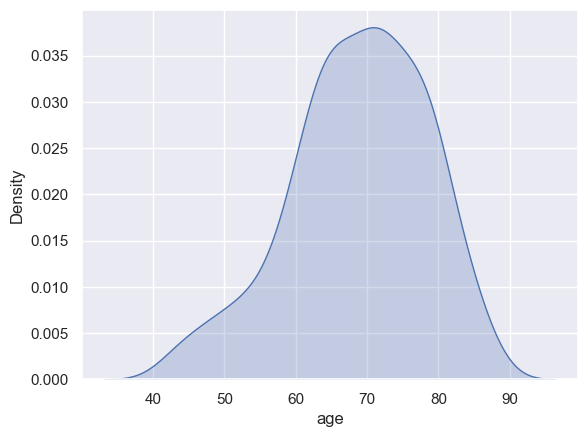

In [244]:
sns.set_theme(style="darkgrid")
sns.kdeplot(x_cli_train['age'], fill=True)
plt.show()

'age' has a unimodal density, so we can fill in the nan value with the average of the distribution.

In [245]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')
x_cli_train['age'] = mean_imputer.fit_transform(x_cli_train[['age']])

In [246]:
x_cli_train.Histology.value_counts()

Histology
Adenocarcinoma                         80
large cell                             61
squamous cell carcinoma                59
nos                                    38
adenocarcinoma                         21
Squamous cell carcinoma                19
NSCLC NOS (not otherwise specified)     2
Name: count, dtype: int64

The ‘Histology’ feature contains different names for the same thing in addition to nan values

In [247]:
x_cli_train['Histology'] = x_cli_train['Histology'].apply(
  lambda x : 'AC' if x in('Adenocarcinoma', 'adenocarcinoma')
  else 'LG' if x == 'large cell'
  else 'SCC' if x in ('squamous cell carcinoma', 'Squamous cell carcinoma')
  else 'Other'
  )

In [248]:
x_cli_train.isna().sum()

Histology        0
Mstage           0
Nstage           0
SourceDataset    0
Tstage           0
age              0
dtype: int64

We have now processed all the NaN values.

### Visualisation & preprocessing

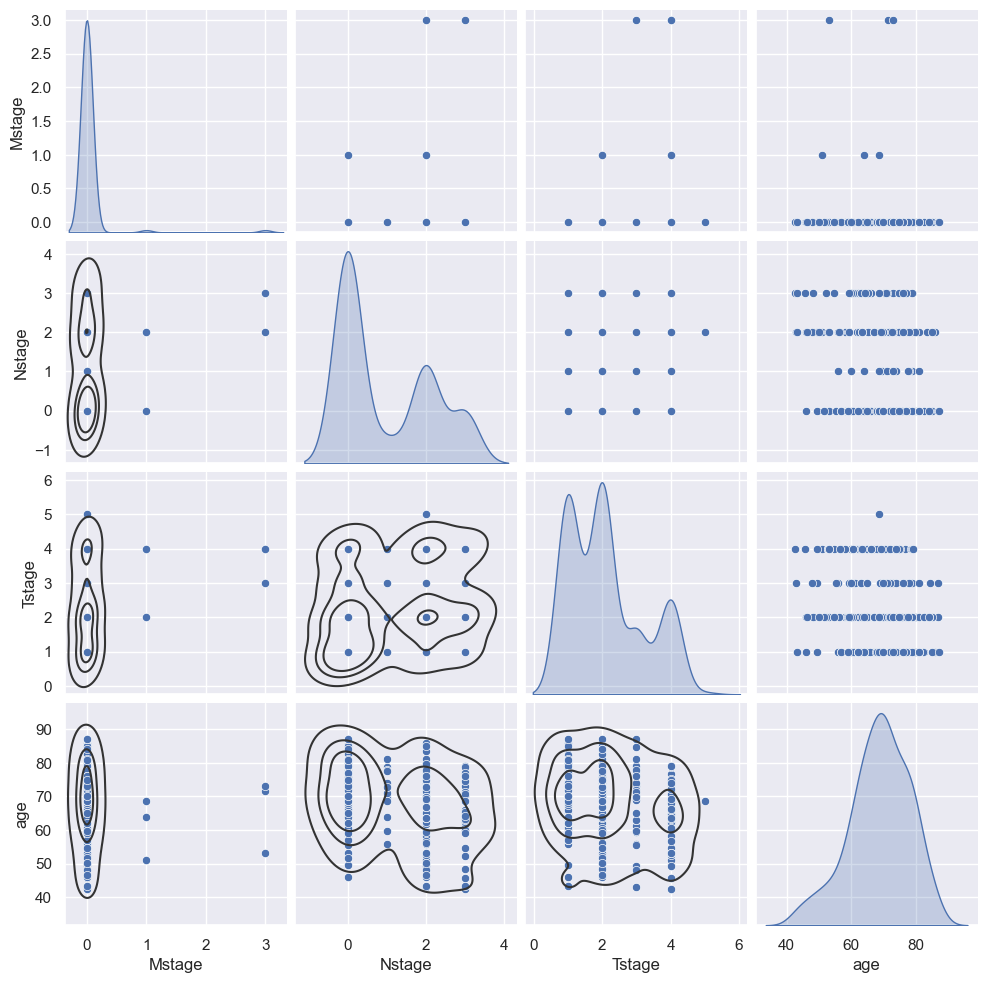

In [249]:
g = sns.pairplot(x_cli_train, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

Let's take a closer look at the other features

In [250]:
x_cli_train.Mstage.value_counts()

Mstage
0    294
3      3
1      3
Name: count, dtype: int64

'Mstage’ is almost constant, we should remove this feature and avoid convergence in the model.

In [251]:
x_cli_train = x_cli_train.drop(columns='Mstage')

In [252]:
x_cli_train.Nstage.value_counts()

Nstage
0    167
2     76
3     40
1     17
Name: count, dtype: int64

In [253]:
x_cli_train.Tstage.value_counts()

Tstage
2    111
1    105
4     50
3     33
5      1
Name: count, dtype: int64

Group 5 contains only one person, so we should replace this 5 with a 4.

In [254]:
x_cli_train.Tstage = x_cli_train.Tstage.apply(lambda x : 4 if x==5 else x)

In [255]:
x_cli_train.head()

,Histology,Nstage,SourceDataset,Tstage,age
PatientID,,,,,
202,AC,0,l2,2,66.0000
371,LG,2,l1,4,64.5722
246,SCC,3,l1,2,66.0452
240,Other,2,l1,3,59.3566
284,SCC,3,l1,4,71.0554


### Import Radiomics

In [256]:
x_rad_train = pd.read_csv('data_x_train/features/radiomics.csv', header = 1, index_col=0)
x_rad_train.head()

,original_shape_Compactness1,original_shape_Compactness2,original_shape_Maximum3DDiameter,original_shape_SphericalDisproportion,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_Energy,original_firstorder_Entropy,...,original_glrlm_LongRunEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_RunLengthNonUniformity,original_glrlm_RunPercentage,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis
PatientID,,,,,,,,,,,,,,,,,,,,,
202,0.027815,0.274892,48.559242,1.537964,0.650210,5431.333210,0.275228,19786.0,3.942944e+09,5.138062,...,1.457980,555.378594,14592.303727,0.891330,0.003562,954.749135,0.003384,851.987373,0.004444,1651.710761
371,0.023015,0.188210,75.703368,1.744961,0.573079,10369.568729,0.240727,43168.0,3.122890e+09,4.461054,...,2.512125,1766.619373,22881.932686,0.766032,0.002246,1092.823724,0.002069,884.838627,0.003633,3386.995589
246,0.027348,0.265740,70.434367,1.555420,0.642913,10558.818691,0.200766,52655.0,1.059535e+09,3.437111,...,4.096838,3462.816344,18773.106002,0.644554,0.001880,878.989601,0.001635,634.910036,0.004869,4232.418080
240,0.026811,0.255406,46.818800,1.576120,0.634469,4221.412123,0.323878,13074.0,6.583324e+08,4.352564,...,1.824328,683.869792,7978.285176,0.828138,0.002855,907.045929,0.002680,774.885387,0.003901,1844.746046
284,0.023691,0.199424,53.795911,1.711620,0.584242,5295.900331,0.327241,16237.0,8.072532e+08,4.055700,...,2.652580,962.094760,7520.054910,0.734898,0.006710,1513.420445,0.004704,1197.140900,0.023273,4444.272812


In [257]:
x_rad_train.isna().sum().sum()

0

In [258]:
x_train = pd.merge(x_cli_train, x_rad_train, how='inner', left_index=True, right_index=True, sort=True)
x_train.head()

,Histology,Nstage,SourceDataset,Tstage,age,original_shape_Compactness1,original_shape_Compactness2,original_shape_Maximum3DDiameter,original_shape_SphericalDisproportion,original_shape_Sphericity,...,original_glrlm_LongRunEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_RunLengthNonUniformity,original_glrlm_RunPercentage,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis
PatientID,,,,,,,,,,,,,,,,,,,,,
2,AC,0,l1,3,59.4223,0.024239,0.208753,100.682670,1.685735,0.593213,...,4.681262,20051.589877,54352.774029,0.608142,0.000918,1342.009256,0.000710,938.104181,0.003537,6567.332842
3,SCC,3,l1,1,77.0986,0.014520,0.074913,178.117938,2.372178,0.421554,...,1.194862,121.860389,3683.000792,0.943351,0.004979,731.875365,0.004741,695.615307,0.006145,901.956835
4,SCC,0,l1,3,84.5722,0.022972,0.187502,133.895482,1.747154,0.572359,...,2.776563,3687.540945,53820.687146,0.740312,0.001657,1431.057216,0.001459,1208.546317,0.003430,3740.268350
5,Other,0,l1,2,71.8439,0.030597,0.332627,39.319207,1.443269,0.692871,...,7.285089,1006.359656,1565.874316,0.501632,0.001258,1328.848441,0.000986,816.256111,0.005828,10016.147961
7,SCC,0,l1,4,60.7283,0.024970,0.221540,97.989795,1.652657,0.605086,...,4.868237,17465.053523,56507.954765,0.605997,0.001264,1264.678549,0.001025,879.772376,0.004216,6675.271359


In [259]:
x_train.dtypes.value_counts()

float64    54
object      2
int64       2
Name: count, dtype: int64

### One-Hot Encoding & StandardScaler

We will now normalise the floating features and the encoded categorical features.

In [260]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [261]:
float_features = x_train.select_dtypes(include=['float64']).columns
sc = StandardScaler()
x_train[float_features] = sc.fit_transform(x_train[float_features])

In [262]:
x_train.head()

,Histology,Nstage,SourceDataset,Tstage,age,original_shape_Compactness1,original_shape_Compactness2,original_shape_Maximum3DDiameter,original_shape_SphericalDisproportion,original_shape_Sphericity,...,original_glrlm_LongRunEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_RunLengthNonUniformity,original_glrlm_RunPercentage,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis
PatientID,,,,,,,,,,,,,,,,,,,,,
2,AC,0,l1,3,-1.003497,-0.296565,-0.407419,1.041538,0.058710,-0.252390,...,0.740417,2.182350,1.063666,-1.161051,-0.497436,0.787337,-0.567248,0.371467,-0.256386,0.702738
3,SCC,3,l1,1,0.894732,-1.863412,-1.578664,3.224409,2.196868,-1.953443,...,-0.793132,-0.532156,-0.587324,1.239644,0.003800,-0.876792,0.050610,-0.569984,-0.151931,-0.822235
4,SCC,0,l1,3,1.697310,-0.500805,-0.593384,1.977795,0.250020,-0.459038,...,-0.097396,-0.046496,1.046329,-0.214471,-0.406225,1.030214,-0.452494,1.421445,-0.260663,-0.058235
5,Other,0,l1,2,0.330439,0.728468,0.676625,-0.688274,-0.696534,0.735175,...,1.885752,-0.411683,-0.656307,-1.923848,-0.455492,0.751441,-0.525034,-0.101602,-0.164628,1.631071
7,SCC,0,l1,4,-0.863247,-0.178656,-0.295517,0.965627,-0.044323,-0.134732,...,0.822660,1.830054,1.133889,-1.176408,-0.454685,0.576419,-0.519085,0.144997,-0.229200,0.731793


In [263]:
cat_features = x_train.select_dtypes(include=['object']).columns

onehot_enc = OneHotEncoder(sparse_output = False)
onehot_enc.fit(x_train[cat_features])

x_train_encoded = onehot_enc.transform(x_train[cat_features])
encoded_columns = onehot_enc.get_feature_names_out()
x_train_encoded_df = pd.DataFrame(x_train_encoded.astype('int'), columns=encoded_columns, index=x_train.index)

x_train = pd.concat([x_train.drop(columns=cat_features), x_train_encoded_df], axis=1)

In [264]:
x_train.head()

,Nstage,Tstage,age,original_shape_Compactness1,original_shape_Compactness2,original_shape_Maximum3DDiameter,original_shape_SphericalDisproportion,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,...,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,Histology_AC,Histology_LG,Histology_Other,Histology_SCC,SourceDataset_l1,SourceDataset_l2
PatientID,,,,,,,,,,,,,,,,,,,,,
2,0,3,-1.003497,-0.296565,-0.407419,1.041538,0.058710,-0.252390,1.461731,-1.142877,...,-0.567248,0.371467,-0.256386,0.702738,1,0,0,0,1,0
3,3,1,0.894732,-1.863412,-1.578664,3.224409,2.196868,-1.953443,-0.660012,2.271780,...,0.050610,-0.569984,-0.151931,-0.822235,0,0,0,1,1,0
4,0,3,1.697310,-0.500805,-0.593384,1.977795,0.250020,-0.459038,0.830792,-0.944100,...,-0.452494,1.421445,-0.260663,-0.058235,0,0,0,1,1,0
5,0,2,0.330439,0.728468,0.676625,-0.688274,-0.696534,0.735175,-0.676635,0.087146,...,-0.525034,-0.101602,-0.164628,1.631071,0,0,1,0,1,0
7,0,4,-0.863247,-0.178656,-0.295517,0.965627,-0.044323,-0.134732,1.462009,-1.168301,...,-0.519085,0.144997,-0.229200,0.731793,0,0,0,1,1,0


In [265]:
features_ = x_train.columns.to_list()
index_ = x_train.index

## Pipeline

We now create a pipeline to transform our test data and make it usable by the model.
For categorical data, we'll use the one-hot encoding.
For numerical data, we'll use the standard scaling encoding.

In [315]:
x_cli_train = pd.read_csv('data_x_train/features/clinical_data_train.csv', index_col=0, dtype = {'PatientID': object})
x_rad_train = pd.read_csv('data_x_train/features/radiomics.csv', index_col=0, header=1, dtype = {'PatientID': object})
x_train = pd.merge(x_cli_train, x_rad_train, how = 'inner', left_index= True, right_index=True)
x_train.head()

,Histology,Mstage,Nstage,SourceDataset,Tstage,age,original_shape_Compactness1,original_shape_Compactness2,original_shape_Maximum3DDiameter,original_shape_SphericalDisproportion,...,original_glrlm_LongRunEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_RunLengthNonUniformity,original_glrlm_RunPercentage,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis
PatientID,,,,,,,,,,,,,,,,,,,,,
202,Adenocarcinoma,0,0,l2,2,66.0000,0.027815,0.274892,48.559242,1.537964,...,1.457980,555.378594,14592.303727,0.891330,0.003562,954.749135,0.003384,851.987373,0.004444,1651.710761
371,large cell,0,2,l1,4,64.5722,0.023015,0.188210,75.703368,1.744961,...,2.512125,1766.619373,22881.932686,0.766032,0.002246,1092.823724,0.002069,884.838627,0.003633,3386.995589
246,squamous cell carcinoma,0,3,l1,2,66.0452,0.027348,0.265740,70.434367,1.555420,...,4.096838,3462.816344,18773.106002,0.644554,0.001880,878.989601,0.001635,634.910036,0.004869,4232.418080
240,nos,0,2,l1,3,59.3566,0.026811,0.255406,46.818800,1.576120,...,1.824328,683.869792,7978.285176,0.828138,0.002855,907.045929,0.002680,774.885387,0.003901,1844.746046
284,squamous cell carcinoma,0,3,l1,4,71.0554,0.023691,0.199424,53.795911,1.711620,...,2.652580,962.094760,7520.054910,0.734898,0.006710,1513.420445,0.004704,1197.140900,0.023273,4444.272812


In [288]:

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer


cat_features = x_train.select_dtypes(include=['object']).columns
float_features = x_train.select_dtypes(include=['float64']).columns
int_features = x_train.select_dtypes(include=['int64']).columns

float_transfo = Pipeline([
    ('nan_value', SimpleImputer(strategy="mean")),  # Imputation des NaN
    ('scaler', StandardScaler()),  # Normalisation
    ('to_float', FunctionTransformer(lambda X: X.astype('float64')))  # Assurer que les données sont en float64
])

cat_transfo = Pipeline([
    ('preprocessing_cat', FunctionTransformer(lambda X: X.assign(
        Histology=X['Histology'].map({
            'Adenocarcinoma': 'AC', 'adenocarcinoma': 'AC',
            'large cell': 'LG', 'Squamous cell carcinoma': 'SCC', 
            'squamous cell carcinoma': 'SCC', 'Squamous cell carcinoma': 'SCC'
        }).fillna('Other'))),
    ),
    ('encoder', OneHotEncoder(sparse_output=False)),  # Encodage One-Hot
    ('to_int', FunctionTransformer(lambda X: X.astype('int64')))  # Convertir les résultats en int
])

int_transfo = Pipeline([
    ('preprocessing_int', FunctionTransformer(lambda X: X.assign(Tstage=X['Tstage'].apply(lambda x: 4 if x == 5 else x)).drop(columns='Mstage'))),
    ('to_int', FunctionTransformer(lambda X: X.astype('int64')))  # Assurer que les données sont en int64
])

preprocessor = ColumnTransformer(
    transformers=[
        ('int', int_transfo, int_features),
        ('float', float_transfo, float_features),
        ('cat', cat_transfo, cat_features)
    ])


In [289]:
x_train_ = preprocessor.fit_transform(x_train)
x_train = pd.DataFrame(x_train_, columns= features_, index= index_)
x_train[['Tstage', 'Nstage']] = x_train[['Tstage', 'Nstage']].astype('int64')
x_train[encoded_columns] = x_train[encoded_columns].astype('int64')
x_train.head()

,Nstage,Tstage,age,original_shape_Compactness1,original_shape_Compactness2,original_shape_Maximum3DDiameter,original_shape_SphericalDisproportion,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,...,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,Histology_AC,Histology_LG,Histology_Other,Histology_SCC,SourceDataset_l1,SourceDataset_l2
PatientID,,,,,,,,,,,,,,,,,,,,,
2,0,2,-0.297128,0.279967,0.171372,-0.427801,-0.401574,0.312424,-0.439710,-0.346245,...,-0.157392,0.037123,-0.220072,-0.620421,1,0,0,0,0,1
3,2,4,-0.450457,-0.493821,-0.587190,0.337381,0.243189,-0.451910,0.009116,-0.554709,...,-0.358934,0.164666,-0.252541,-0.153327,0,1,0,0,1,0
4,3,2,-0.292274,0.204689,0.091284,0.188850,-0.347201,0.240113,0.026316,-0.796164,...,-0.425581,-0.805669,-0.203033,0.074239,0,0,0,1,1,0
5,2,3,-1.010552,0.118113,0.000854,-0.476864,-0.282723,0.156439,-0.549678,-0.052287,...,-0.265421,-0.262222,-0.241803,-0.568461,0,0,1,0,1,0
7,3,4,0.245763,-0.384876,-0.489053,-0.280182,0.139337,-0.341289,-0.452020,-0.031968,...,0.044891,1.377164,0.533905,0.131265,0,0,0,1,1,0


## Test Database

In [320]:
x_cli_test = pd.read_csv('data_x_test/features/clinical_data.csv', index_col=0, dtype = {'PatientID': object})
x_rad_test = pd.read_csv('data_x_test/features/radiomics.csv', index_col=0, header=1, dtype = {'PatientID': object})
x_test = pd.merge(x_cli_test, x_rad_test, how = 'inner', left_index= True, right_index=True)
x_test.head()

,Histology,Mstage,Nstage,SourceDataset,Tstage,age,original_shape_Compactness1,original_shape_Compactness2,original_shape_Maximum3DDiameter,original_shape_SphericalDisproportion,...,original_glrlm_LongRunEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_RunLengthNonUniformity,original_glrlm_RunPercentage,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis
PatientID,,,,,,,,,,,,,,,,,,,,,
013,nos,0,0,l1,4,44.3970,0.028885,0.296451,106.901824,1.499738,...,5.786839,21219.447221,64776.697579,0.567095,0.001493,808.353957,0.001094,554.111998,0.007535,4654.031976
155,adenocarcinoma,0,3,l1,1,63.3183,0.031948,0.362660,18.814888,1.402276,...,1.160397,25.291608,795.675280,0.953475,0.011646,548.964573,0.010836,529.644029,0.015633,639.621963
404,large cell,0,2,l1,2,64.7255,0.015999,0.090945,105.080921,2.223687,...,4.064385,3225.808332,14007.509285,0.644247,0.001171,1600.952265,0.001003,1181.377774,0.003027,7156.937667
407,nos,0,0,l1,2,65.3635,0.031358,0.349373,46.968074,1.419832,...,2.902586,1147.928170,6094.805584,0.711467,0.002104,1533.217788,0.001900,1182.876363,0.003685,4776.549408
009,Adenocarcinoma,0,0,l2,2,50.0000,0.017815,0.112759,56.542020,2.069901,...,1.195505,652.071367,15924.101510,0.942025,0.019281,344.205786,0.018221,331.901212,0.024175,400.015847


In [322]:
index_ = x_test.index
x_test_ = preprocessor.fit_transform(x_test)
x_test = pd.DataFrame(x_test_, columns= features_, index= index_)
x_test[['Tstage', 'Nstage']] = x_test[['Tstage', 'Nstage']].astype('int64')
x_test[encoded_columns] = x_test[encoded_columns].astype('int64')
x_test.head()

,Nstage,Tstage,age,original_shape_Compactness1,original_shape_Compactness2,original_shape_Maximum3DDiameter,original_shape_SphericalDisproportion,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,...,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,Histology_AC,Histology_LG,Histology_Other,Histology_SCC,SourceDataset_l1,SourceDataset_l2
PatientID,,,,,,,,,,,,,,,,,,,,,
013,0,4,-2.366587,0.627706,0.545594,1.085971,-0.689679,0.648336,1.618209,-1.331799,...,-0.653035,-1.039145,-0.113802,0.193340,0,0,1,0,1,0
155,3,1,-0.441360,1.138111,1.152852,-1.438263,-1.018794,1.123164,-0.943345,2.316249,...,1.240108,-1.125009,0.598041,-0.934570,1,0,0,0,1,0
404,2,2,-0.298178,-1.519514,-1.339287,1.033791,1.754972,-1.575823,0.126050,-0.089045,...,-0.670635,1.162093,-0.510093,0.896570,0,1,0,0,1,0
407,0,2,-0.233262,1.039682,1.030986,-0.631501,-0.959511,1.032820,-0.633845,-0.294512,...,-0.496381,1.167352,-0.452210,0.227763,0,0,1,0,1,0
009,0,2,-1.796486,-1.216969,-1.139212,-0.357148,1.235662,-1.233496,-0.361477,0.286894,...,2.675328,-1.818940,1.348959,-1.001891,1,0,0,0,0,1


## y_train

In [329]:
y_train= pd.read_csv('data_y_train.csv')
y_train.head()

,PatientID,SurvivalTime,Event
0,202,1378,0
1,371,379,1
2,246,573,1
3,240,959,0
4,284,2119,0


In [336]:
y_train.isna().sum().sum()

0

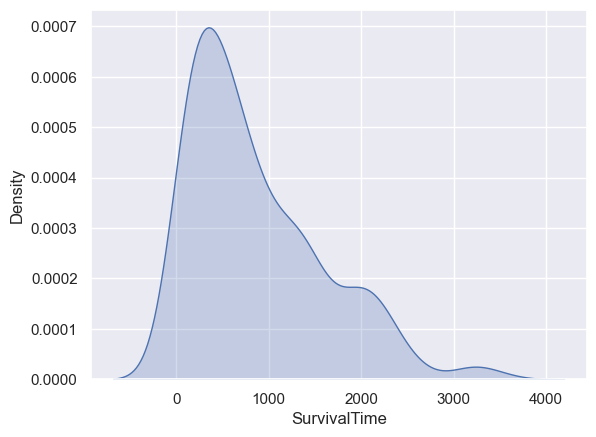

In [ ]:
sns.kdeplot(y_train['SurvivalTime'], fill=True)
plt.show()

In [338]:
y_train.Event.value_counts()

Event
1    162
0    138
Name: count, dtype: int64

Death occurred in 162 patients